In [55]:
import pandas as pd

In [56]:
df1=pd.read_csv(r"D:\python\Vehicle Sales Data.csv")
df1.head()

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,DomesticSale,ExportSale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


In [57]:
df1.isnull().sum()

Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 1         12
SIAM Segment 2          0
SIAM Fuel              18
Month                   0
Year                    0
Production Qty          0
DomesticSale            0
ExportSale              0
Category             1097
Category Name        1097
YrMth                   0
dtype: int64

In [58]:
df2=df1.dropna()


In [59]:
df2.isnull().sum()

Vehicle Full Code    0
Vehicle Code         0
OEM Model Name       0
SIAM Company Code    0
SIAM Segment 1       0
SIAM Segment 2       0
SIAM Fuel            0
Month                0
Year                 0
Production Qty       0
DomesticSale         0
ExportSale           0
Category             0
Category Name        0
YrMth                0
dtype: int64

In [60]:
import matplotlib.pyplot as plt

In [61]:
print(df1.describe())

               Year
count  19666.000000
mean    2015.257399
std        2.290398
min     2012.000000
25%     2013.000000
50%     2015.000000
75%     2017.000000
max     2019.000000


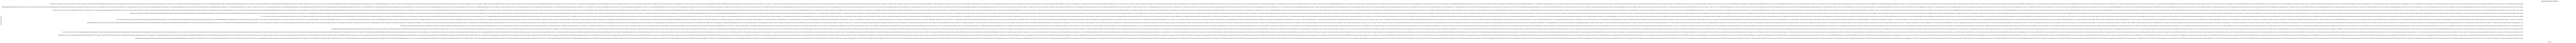

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
Month = df1.groupby("Month")['DomesticSale'].sum().reset_index()
month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

plt.bar(Month['Month'], Month['DomesticSale'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total DomesticSales')
plt.title('Total DomesticSales by Month')
plt.xticks(month_order)
plt.xticks(rotation=45)
plt.show()


In [94]:

df1['DomesticSale'] = df1['DomesticSale'].replace(',', '')
df1['ExportSale'] = df1['ExportSale'].replace(',', '')

# Convert to numeric type
df1['DomesticSale'] = pd.to_numeric(df1['DomesticSale'])
df1['ExportSale'] = pd.to_numeric(df1['ExportSale'])

# Aggregate sales by company
company_sales = df1.groupby('SIAM Company Code')[['DomesticSale', 'ExportSale']].sum()

# Calculate total sales for each company
company_sales['Total Sales'] = company_sales['DomesticSale'] + company_sales['ExportSale']

# Find top 3 companies with the highest total sales
top_5_companies = company_sales.nlargest(5, 'Total Sales')

print("Top 5 companies with the highest total sales:")
print(top_5_companies)






Top 5 companies with the highest total sales:
                         DomesticSale  ExportSale  Total Sales
SIAM Company Code                                             
MARUTI SUZUKI INDIA LTD    10398653.0    806579.0   11205232.0
HYUNDAI MOTOR INDIA LTD     3602032.0   1269030.0    4871062.0
MAHINDRA & MAHINDRA LTD     1852068.0     61151.0    1913219.0
TATA MOTORS LTD             1475864.0     28554.0    1504418.0
FORD INDIA PVT LTD           639225.0    839520.0    1478745.0


In [81]:
model_sales = df1.groupby('OEM Model Name')[['DomesticSale', 'ExportSale']].sum()
model_sales['Total Sales'] = model_sales['DomesticSale'] + model_sales['ExportSale']
top_3_model= model_sales.nlargest(5, 'Total Sales')
print("Top 3 models with the highest total sales:")
print(top_3_model)


Top 3 models with the highest total sales:
                DomesticSale  ExportSale  Total Sales
OEM Model Name                                       
Alto               1951987.0    177837.0    2129824.0
DZIRES             1640164.0     74638.0    1714802.0
Swift              1475900.0     94921.0    1570821.0
Wagon R            1238240.0      4526.0    1242766.0
Grand i10           778359.0    282119.0    1060478.0


In [84]:
segment_sales = df1.groupby('SIAM Segment 1')[['DomesticSale', 'ExportSale']].sum()
segment_sales['Total Sales'] = segment_sales['DomesticSale'] + segment_sales['ExportSale']
top_3_segment= segment_sales.nlargest(10, 'Total Sales')
print("Top 3 models with the highest total sales:")
print(top_3_segment)


Top 3 models with the highest total sales:
                DomesticSale  ExportSale  Total Sales
SIAM Segment 1                                       
B                  5970951.0   1403219.0    7374170.0
B+                 4234615.0   1092843.0    5327458.0
C                  3530485.0    534851.0    4065336.0
SUV                3178958.0    793302.0    3972260.0
MPV                3688967.0     67162.0    3756129.0
C+                 1265311.0    791952.0    2057263.0
A LOW               123086.0      2621.0     125707.0
D                    88451.0         0.0      88451.0
A                    34781.0      4951.0      39732.0
E                    21625.0       180.0      21805.0


In [96]:
fuel_sales = df1.groupby('SIAM Fuel')[['DomesticSale', 'ExportSale']].sum()
fuel_sales['Total Sales'] = fuel_sales['DomesticSale'] + fuel_sales['ExportSale']
top_5_fuel= fuel_sales.nlargest(10, 'Total Sales')
print("Top 5 models with the highest total sales:")
print(top_5_fuel)

Top 5 models with the highest total sales:
           DomesticSale  ExportSale  Total Sales
SIAM Fuel                                       
PETROL       12411812.0   4433101.0   16844913.0
DIESEL        9678601.0    257500.0    9936101.0
LPG             47834.0         0.0      47834.0
HYBRID           6564.0         0.0       6564.0
CNG              5371.0       216.0       5587.0
ELECTRIC         3217.0       264.0       3481.0


In [92]:
fuel_type = 'DIESEL' 
fuel_sales = df1[df1['SIAM Fuel'] == fuel_type]
company_sales_fuel = fuel_sales.groupby('SIAM Company Code')[['DomesticSale', 'ExportSale']].sum()
company_sales_fuel['Total Sales'] = company_sales_fuel['DomesticSale'] + company_sales_fuel['ExportSale']
highest_sales_company_fuel = company_sales_fuel['Total Sales'].idxmax()
highest_sales_value_fuel = company_sales_fuel['Total Sales'].max()

print(f"The company with the highest total sales of {fuel_type} cars is: {highest_sales_company_fuel} with total sales of: {highest_sales_value_fuel}")


The company with the highest total sales of DIESEL cars is: MARUTI SUZUKI INDIA LTD with total sales of: 3078619.0


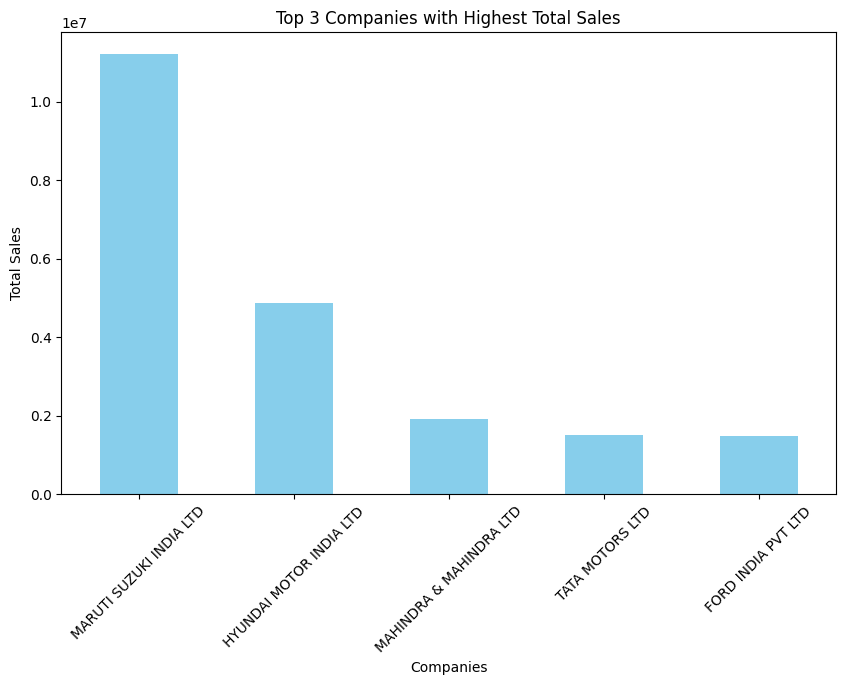

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_3_companies['Total Sales'].plot(kind='bar', color='skyblue')
plt.title('Top 3 Companies with Highest Total Sales')
plt.xlabel('Companies')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


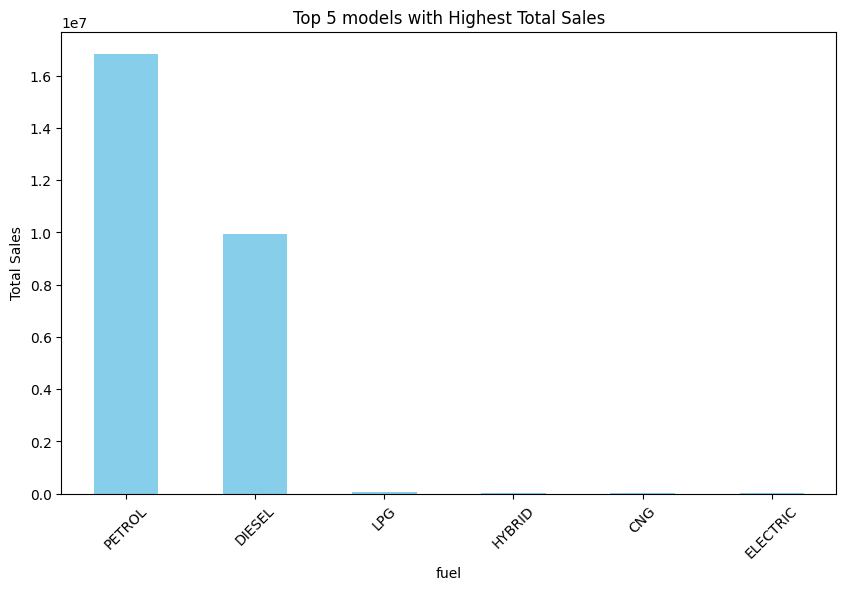

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_5_fuel['Total Sales'].plot(kind='bar', color='skyblue')
plt.title('Top 5 models with Highest Total Sales')
plt.xlabel('fuel')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

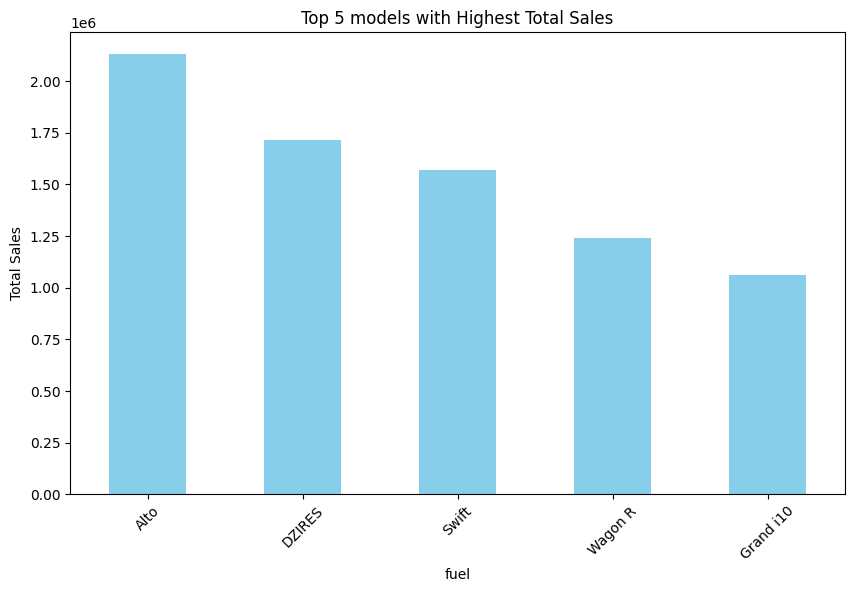

In [104]:
plt.figure(figsize=(10, 6))
top_3_model['Total Sales'].plot(kind='bar', color='skyblue')
plt.title('Top 5 models with Highest Total Sales')
plt.xlabel('fuel')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_16468\3636951430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")


<Axes: >

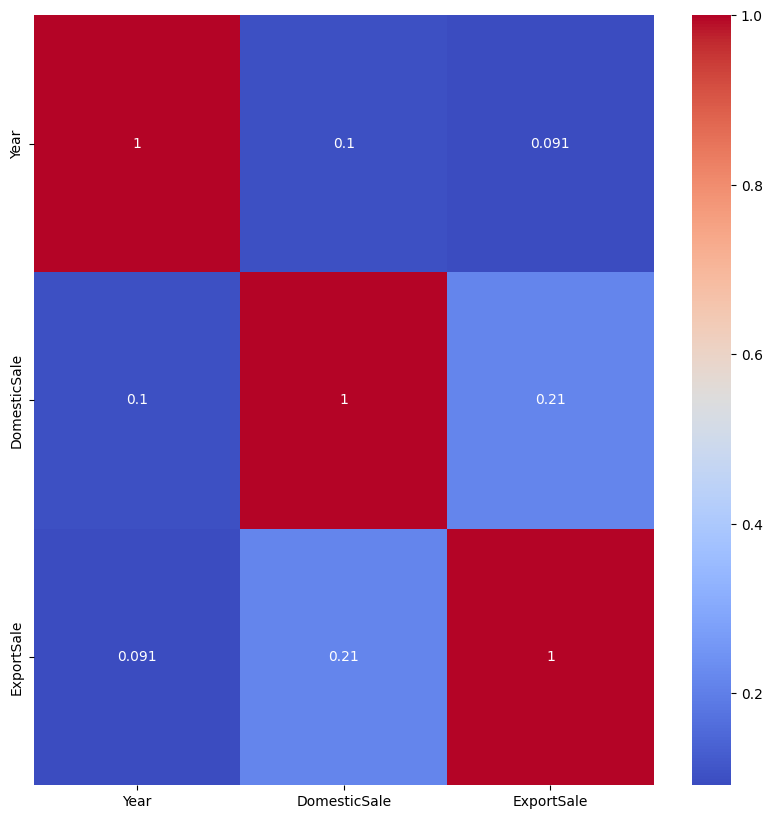

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")

In [113]:
column_name = 'DomesticSale'  # Replace 'Your_Column_Name' with the column name you're checking for outliers

Q1 = df1['DomesticSale'].quantile(0.25)
Q3 = df1['DomesticSale'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df1[(df1['DomesticSale'] < lower_bound) | (df1['DomesticSale'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
      Vehicle Full Code Vehicle Code OEM Model Name  \
20           TKIAF1U2DI           IA         Innova   
25           MMXOF1U2DI           XO           Xylo   
65           TKIAF1U2DI           IA         Innova   
114          MMBOF1U1DI           BO         Bolero   
122          MSERF1U1DI           ER         Ertiga   
...                 ...          ...            ...   
19639        MSOIF1V1PT           OI           Omni   
19640        MSEEF1V1PT           EE           Eeco   
19652        MSAOOBMIPT           AO           Alto   
19653        MSWROBMIPT           WR        Wagon R   
19654        RIKWOBMIPT           KW           KWID   

                    SIAM Company Code SIAM Segment 1 SIAM Segment 2 SIAM Fuel  \
20     TOYOTA KIRLOSKAR MOTOR PVT LTD            MPV            UV2    DIESEL   
25            MAHINDRA & MAHINDRA LTD            MPV            UV2    DIESEL   
65     TOYOTA KIRLOSKAR MOTOR PVT LTD            MPV            UV2    DIESEL   
114  